In [3]:
import os
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt


In [7]:
! unzip no.zip

Archive:  no.zip
   creating: no/
  inflating: __MACOSX/._no           
  inflating: no/30 no.jpg            
  inflating: __MACOSX/no/._30 no.jpg  
  inflating: no/22 no.jpg            
  inflating: __MACOSX/no/._22 no.jpg  
  inflating: no/41 no.jpg            
  inflating: __MACOSX/no/._41 no.jpg  
  inflating: no/14 no.jpg            
  inflating: __MACOSX/no/._14 no.jpg  
  inflating: no/no 10.jpg            
  inflating: __MACOSX/no/._no 10.jpg  
  inflating: no/18 no.jpg            
  inflating: __MACOSX/no/._18 no.jpg  
  inflating: no/no 9.png             
  inflating: __MACOSX/no/._no 9.png  
  inflating: no/no 7.jpeg            
  inflating: __MACOSX/no/._no 7.jpeg  
  inflating: no/no 8.jpg             
  inflating: __MACOSX/no/._no 8.jpg  
  inflating: no/no.jpg               
  inflating: __MACOSX/no/._no.jpg    
  inflating: no/3 no.jpg             
  inflating: __MACOSX/no/._3 no.jpg  
  inflating: no/43 no.jpg            
  inflating: __MACOSX/no/._43 no.jpg  
  inflat

In [8]:
! unzip yes.zip

Archive:  yes.zip
   creating: yes/
  inflating: __MACOSX/._yes          
  inflating: yes/Y157.JPG            
  inflating: __MACOSX/yes/._Y157.JPG  
  inflating: yes/Y6.jpg              
  inflating: __MACOSX/yes/._Y6.jpg   
  inflating: yes/Y194.jpg            
  inflating: __MACOSX/yes/._Y194.jpg  
  inflating: yes/Y180.jpg            
  inflating: __MACOSX/yes/._Y180.jpg  
  inflating: yes/Y90.jpg             
  inflating: __MACOSX/yes/._Y90.jpg  
  inflating: yes/Y47.JPG             
  inflating: __MACOSX/yes/._Y47.JPG  
  inflating: yes/Y53.jpg             
  inflating: __MACOSX/yes/._Y53.jpg  
  inflating: yes/Y52.jpg             
  inflating: __MACOSX/yes/._Y52.jpg  
  inflating: yes/Y46.jpg             
  inflating: __MACOSX/yes/._Y46.jpg  
  inflating: yes/Y91.jpg             
  inflating: __MACOSX/yes/._Y91.jpg  
  inflating: yes/Y85.JPG             
  inflating: __MACOSX/yes/._Y85.JPG  
  inflating: yes/Y181.jpg            
  inflating: __MACOSX/yes/._Y181.jpg  
  inflatin

In [9]:
# Path to your dataset
path_no = "/content/no"
path_yes = '/content/yes'

In [18]:
def retrieve_images(folder_path, max_num_images=5):
    image_list = []
    for file_name in os.listdir(folder_path)[:max_num_images]:
        image = cv2.imread(os.path.join(folder_path, file_name), cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image_list.append(image)
    return image_list

In [19]:
images_yes = load_images_from_folder(path_yes)
images_no = load_images_from_folder(path_no)

In [20]:
def display_images(img_list, main_title):
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(img_list):
        plt.subplot(1, len(img_list), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(main_title)
        plt.axis('off')
    plt.show()


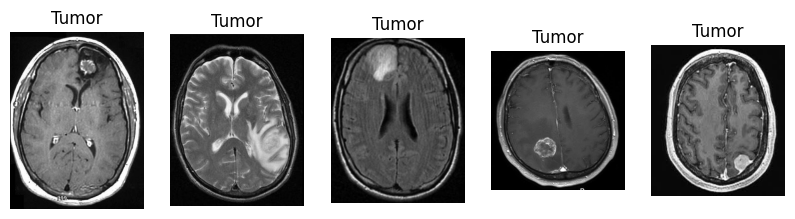

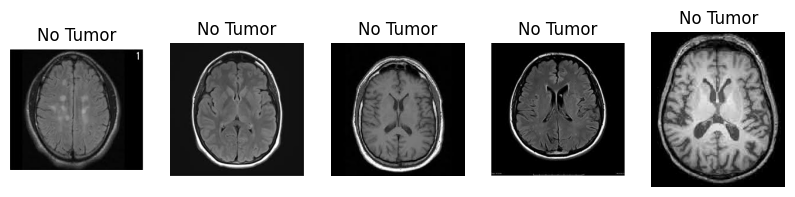

In [21]:
plot_images(images_yes, 'Tumor')
plot_images(images_no, 'No Tumor')

  Pre Processing

In [22]:
def reduce_noise(image):
    return cv2.GaussianBlur(image, (7, 7), 0)

In [23]:
def adjust_contrast(image):
    return exposure.equalize_adapthist(image, clip_limit=0.02)


In [24]:
def resize_and_standardize(image, size=(128, 128)):
    image_resized = cv2.resize(image, size)
    image_standardized = image_resized / 255.0
    return image_standardized


In [25]:
def prepare_image(image):
    image_denoised = remove_noise(image)
    image_contrast_enhanced = enhance_contrast(image_denoised)
    image_final = resize_and_standardize(image_contrast_enhanced)
    return image_final

# Prepare images in both directories
def prepare_images_in_directory(directory):
    prepared_images = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_prepared = prepare_image(img)
            prepared_images.append(img_prepared)
    return np.array(prepared_images)

prepared_images_yes = prepare_images_in_directory(path_yes)
prepared_images_no = prepare_images_in_directory(path_no)

**PreProcessed Images**

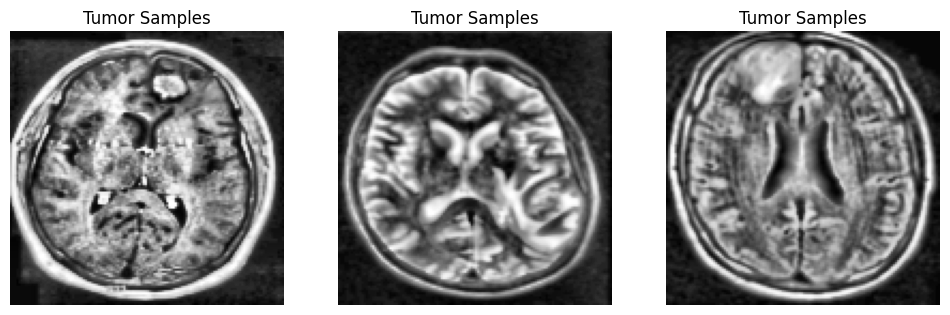

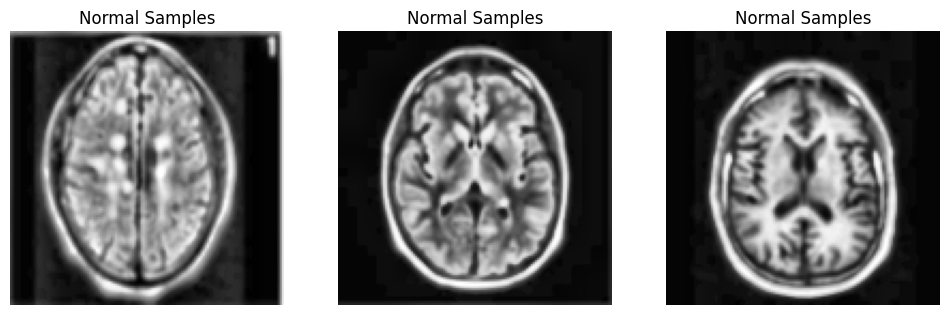

In [26]:
def display_images(image_list, title):
    plt.figure(figsize=(12, 6))
    for i, image in enumerate(image_list):
        plt.subplot(1, len(image_list), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display preprocessed images
display_images(processed_images_yes[:3], 'Tumor Samples')
display_images(processed_images_no[:3], 'Normal Samples')


In [32]:
labels_yes = np.ones(len(processed_images_yes))
labels_no = np.zeros(len(processed_images_no))

# Combine data
X = np.concatenate((processed_images_yes, processed_images_no), axis=0)
y = np.concatenate((labels_yes, labels_no), axis=0)

# Reshape X to be compatible with ML models
X = X.reshape(X.shape[0], -1)  # Flatten the images for traditional ML algorithms

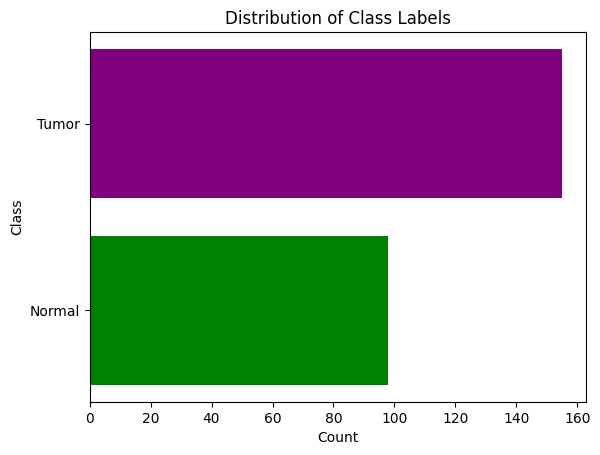

In [33]:
# Count the occurrences of each class label
unique_classes, class_counts = np.unique(y_labels, return_counts=True)

# Visualize the distribution of class labels with a horizontal bar chart
plt.barh(['Normal', 'Tumor'], class_counts, color=['green', 'purple'])
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Distribution of Class Labels')
plt.show()

CNN Model

In [30]:
import os
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)


In [41]:
# Define a different CNN model with altered parameters
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
# Compile the model
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [44]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))


Epoch 1/7
7/7 [==============================] - 30s 4s/step - loss: 0.6659 - accuracy: 0.6337 - val_loss: 0.6963 - val_accuracy: 0.5294
Epoch 2/7
7/7 [==============================] - 16s 2s/step - loss: 0.6644 - accuracy: 0.6337 - val_loss: 0.7144 - val_accuracy: 0.5294
Epoch 3/7
7/7 [==============================] - 24s 3s/step - loss: 0.6578 - accuracy: 0.6337 - val_loss: 0.7408 - val_accuracy: 0.5294
Epoch 4/7
7/7 [==============================] - 26s 4s/step - loss: 0.6701 - accuracy: 0.6337 - val_loss: 0.7152 - val_accuracy: 0.5294
Epoch 5/7
7/7 [==============================] - 20s 3s/step - loss: 0.6585 - accuracy: 0.6337 - val_loss: 0.7034 - val_accuracy: 0.5294
Epoch 6/7
7/7 [==============================] - 21s 3s/step - loss: 0.6590 - accuracy: 0.6337 - val_loss: 0.7228 - val_accuracy: 0.5294
Epoch 7/7
7/7 [==============================] - 15s 2s/step - loss: 0.6590 - accuracy: 0.6337 - val_loss: 0.7125 - val_accuracy: 0.5294


In [45]:
# Evaluate the model
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nAccuracy:', test_acc)

2/2 - 1s - loss: 0.7125 - accuracy: 0.5294 - 873ms/epoch - 436ms/step

Accuracy: 0.529411792755127


In [46]:
# After training your model
model_cnn.save('cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


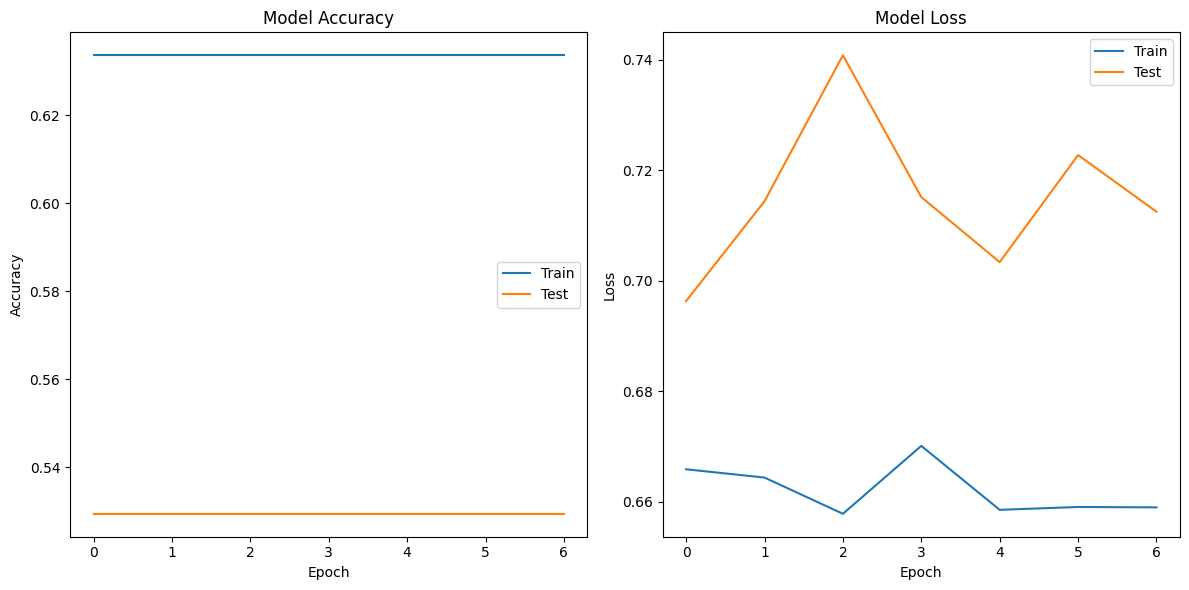

In [47]:
# Import necessary libraries
import seaborn as sns

# Plot training & validation accuracy and loss values using seaborn
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.lineplot(data=history.history['accuracy'], label='Train')
sns.lineplot(data=history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
sns.lineplot(data=history.history['loss'], label='Train')
sns.lineplot(data=history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def classify_image(image_path, model):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # Resize the image to match the input size of the model

    # Reshape for the model
    img = img.reshape(128, 128)

    # Perform prediction
    prediction = model.predict(img)

    # Classify the prediction
    if prediction > 0.5:
        result = 'Tumor'
    else:
        result = 'Normal'

    return result

# Load the saved model
model = tf.keras.models.load_model('cnn_model.h5')

# Example usage:
image_path = '/content/Analysis/brain_tumor_dataset/no/20 no.jpg'  # Path to your input image
result = classify_image(image_path, model)
print('The image is:', result)
